# Steam Üzerinde Oyun Ekonomisi ve Türlere Göre Fiyatlandırma Analizi

## Proje Amacı

Bu projede, Steam oyun verileri kullanılarak oyunların fiyatları ile sahip sayısı, oynama süresi, tür ve kullanıcı beğenileri arasındaki ilişkiler analiz edilmiştir. Amaç; en verimli, alınabilir ve dikkat çekici oyunları keşfetmektir.


In [2]:

# kütüphaneler
import pandas as pd       # veri işleme
import matplotlib.pyplot as plt  # grafik çizimi
import seaborn as sns     # gelişmiş grafik


## Verini İlk 5 Oyunu


In [3]:
# CSV dosyasının yolunu bir değişkene verdim
dosya = r"C:\Users\gts_-\OneDrive\Masaüstü\steamveritabani\steam.csv"

df = pd.read_csv(dosya)  # dosya okuma
df.head()  




,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
# başlıkları ingilizce'den türkçe'ye çevirme

df.rename(columns={
    "appid": "uygulama_id",
    "name": "isim",
    "release_date": "çıkış_tarihi",
    "english": "ingilizce_dil_desteği",
    "developer": "geliştirici",
    "publisher": "yayıncı",
    "platforms": "platformlar",
    "required_age": "gerekli_yaş",
    "categories": "kategoriler",
    "genres": "türler_orijinal",
    "steamspy_tags": "etiketler",
    "achievements": "başarı_sayısı",
    "positive_ratings": "pozitif_oylar",
    "negative_ratings": "negatif_oylar",
    "average_playtime": "ortalama_oyun_süresi",
    "median_playtime": "medyan_oyun_süresi",
    "owners": "sahiplik_aralığı",
    "price": "fiyat",
    "genres_tr": "tür"
}, inplace=True)


In [5]:
# oyun kategorilerini de türkçeleştirme
df["genres_tr"] = df["türler_orijinal"].replace({
    "Action": "Aksiyon",
    "RPG": "Rol Yapma",
    "Simulation": "Simülasyon",
    "Strategy": "Strateji",
    "Adventure": "Macera",
    "Casual": "Gündelik",
    "Racing": "Yarış",
    "Sports": "Spor",
    "Indie": "Bağımsız",
    "Free to Play": "Ücretsiz Oyun"
}, regex=True)


# Başlıklar ve Kategorilerin Türkçeleştirilmiş Hali

In [6]:
df.head()

,uygulama_id,isim,çıkış_tarihi,ingilizce_dil_desteği,geliştirici,yayıncı,platformlar,gerekli_yaş,kategoriler,türler_orijinal,etiketler,başarı_sayısı,pozitif_oylar,negatif_oylar,ortalama_oyun_süresi,medyan_oyun_süresi,sahiplik_aralığı,fiyat,genres_tr
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,Aksiyon
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,Aksiyon
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,Aksiyon
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,Aksiyon
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,Aksiyon


# Boş(NaN) Değerleri Siliyoruz




In [7]:
df = df.dropna(subset=["fiyat", "pozitif_oylar", "negatif_oylar", "ortalama_oyun_süresi"])

# En Çok Oynan Türler ve Ortalama Fiyatları

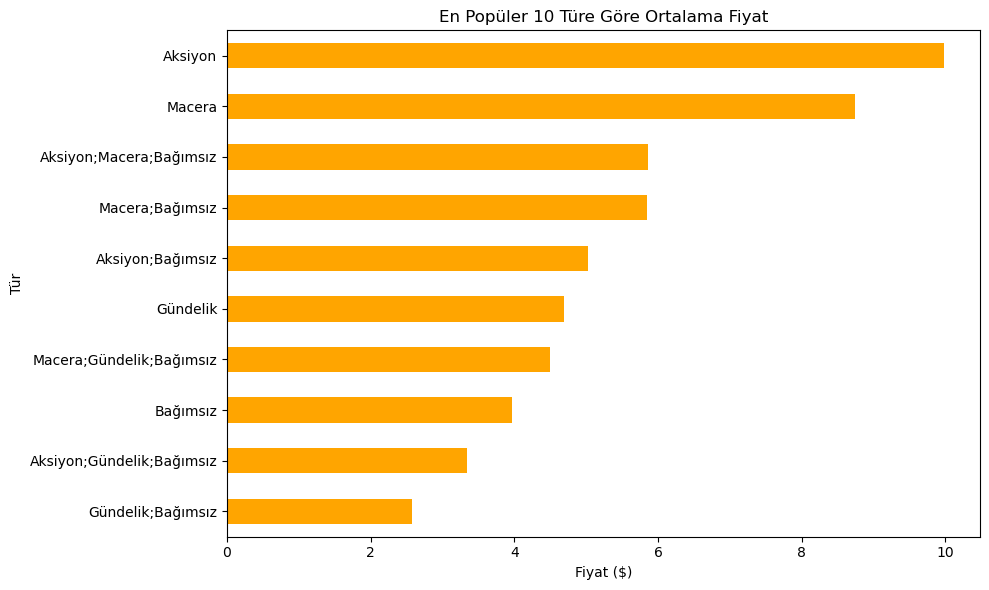

In [8]:
# Ortalama fiyat grafiği çizen fonksiyon
def ortalama_fiyat_grafigi(df, kolon="genres_tr", baslik="Ortalama Fiyat"):
    populer = df[kolon].value_counts().head(10).index  # en popüler 10 kategori
    ort_fiyat = df[df[kolon].isin(populer)].groupby(kolon)["fiyat"].mean().sort_values()  # ort. fiyatlar

    plt.figure(figsize=(10,6))  # grafik boyutu
    # ort_fiyat.plot(kind="bar", color="orange") # dikey grafik
    ort_fiyat.plot(kind="barh", color="orange")  # yatay çubuk grafik
    plt.title(baslik)
    plt.xlabel("Fiyat ($)")
    plt.ylabel("Tür")
    plt.tight_layout()
    plt.show()

# Fonksiyonu çağır
ortalama_fiyat_grafigi(df, "genres_tr", "En Popüler 10 Türe Göre Ortalama Fiyat")





### Yorum

Bazı türlerde (örneğin Aksiyon) ortalama fiyat daha yüksekken, gündelik oyunlar genellikle daha ucuzdur.

In [9]:
# aksiyon en pahalı 10 oyunu listeleyen fonksiyon
def en_pahali_oyunlar(df, tur="Aksiyon", adet=10):
    # aksiyon türü içeren oyunları filtrele
    filtreli = df[df["türler_orijinal"].str.contains(tur)]
    sirali = filtreli.sort_values(by="fiyat", ascending=False)
    sonuc = sirali[["isim", "fiyat", "pozitif_oylar"]].head(adet)
    
    return sonuc

en_pahali_oyunlar(df, "Action", 10)





,isim,fiyat,pozitif_oylar
17126,Tactics 2: War,154.99,3
10624,Tactics: Bludgeons Blessing,154.99,0
14917,CrisisActionVR,154.99,14
12212,Emission VR,75.99,2
21571,DEAD OR ALIVE 6,54.99,1454
13604,Attack on Titan 2 - A.O.T.2 - 進撃の巨人２,54.99,619
21371,WARRIORS OROCHI 4 - 無双OROCHI３,54.99,1820
16476,final m00n - Defender of the Cubes - Day one E...,54.99,3
11828,Toukiden 2,49.99,800
11563,SOULCALIBUR VI,49.99,2992


In [10]:
def en_pahali_oyunlar(df, tur="Indie", adet=10):
    
    filtreli = df[df["türler_orijinal"].str.contains(tur)]
    sirali = filtreli.sort_values(by="fiyat", ascending=False)
    sonuc = sirali[["isim", "fiyat", "pozitif_oylar"]].head(adet)
    return sonuc

en_pahali_oyunlar(df, "Indie", 10)




,isim,fiyat,pozitif_oylar
10910,Silhouette,154.99,13
25568,Bible Test,154.99,24
14917,CrisisActionVR,154.99,14
18503,RealFlight 8,78.99,25
12212,Emission VR,75.99,2
16476,final m00n - Defender of the Cubes - Day one E...,54.99,3
4712,ARK: Survival Evolved,44.99,145035
2453,Cypress Inheritance: The Beginning,44.99,4
7817,Aerofly FS 2 Flight Simulator,44.99,787
16687,The Golf Club™ 2019 featuring PGA TOUR,44.99,217


# Oyunların Sahip Sayısı ve Fiyat İlişkisi

In [12]:
# Normal fonksiyon kullanımı
#def sahiplik_ortalama(s):
   # min_s, max_s = s.split("-")                 
#df["sahip_sayısı"] = df["sahiplik_aralığı"].apply(sahiplik_ortalama)


# lambda kullanım
df["sahip_sayısı"] = df["sahiplik_aralığı"].apply(lambda s: (int(s.split("-")[0]) + int(s.split("-")[1])) // 2)



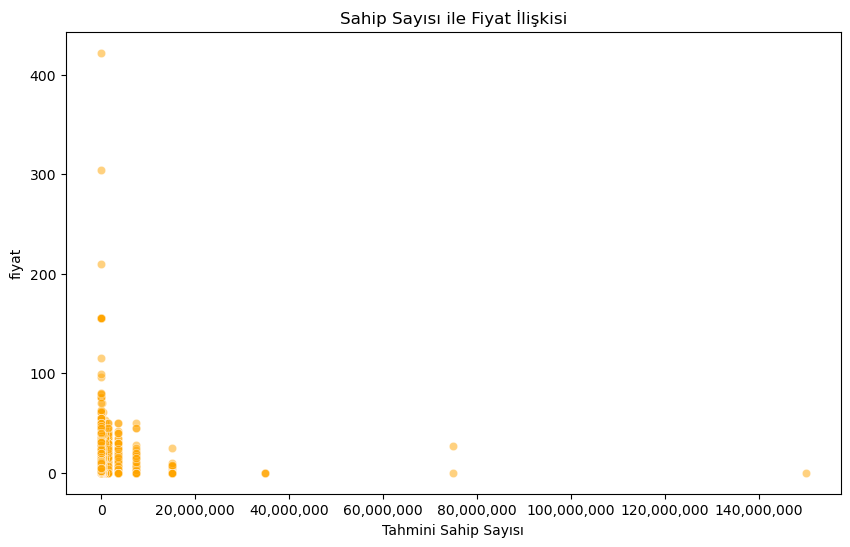

In [13]:
import matplotlib.ticker as ticker
# oyun sahip sayısı ile fiyat ilişkisini çizen fonksiyon
def sahip_vs_fiyat_grafigi(df):
    plt.figure(figsize=(10,6))  
    
    sns.scatterplot(data=df, x="sahip_sayısı", y="fiyat", alpha=0.5,color="orange")  # dağılım grafiği
    
    # x ekseninde sayıları binlik biçimde göster (100000 → 100,000)
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    
    plt.title("Sahip Sayısı ile Fiyat İlişkisi")  
    plt.xlabel("Tahmini Sahip Sayısı")            

sahip_vs_fiyat_grafigi(df)





### Yorum

Fiyatı yüksek olan oyunların sahip sayısı genellikle daha düşüktür; popüler oyunlar genelde daha uygun fiyatlıdır.

In [14]:
# en çok sahip olunan oyunları listeleyen fonk.
def en_cok_sahip_oyunlar(df):
    veri = df[["isim", "sahip_sayısı", "fiyat", "pozitif_oylar"]]
    
    # sahip sayısına göre büyükten küçüğe sırala
    sirali = veri.sort_values(by="sahip_sayısı", ascending=False)
    return sirali.head(10)

en_cok_sahip_oyunlar(df)



,isim,sahip_sayısı,fiyat,pozitif_oylar
22,Dota 2,150000000,0.00,863507
25,Counter-Strike: Global Offensive,75000000,0.00,2644404
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000,26.99,496184
19,Team Fortress 2,35000000,0.00,515879
3362,Unturned,35000000,0.00,292574
1634,Warframe,35000000,0.00,226541
1727,War Thunder,15000000,0.00,83852
23,Portal 2,15000000,7.19,138220
1025,The Elder Scrolls V: Skyrim,15000000,9.99,237303
1467,PAYDAY 2,15000000,7.49,308657


# Pozitif Oy Sayısı ile Fiyat İlişkisi

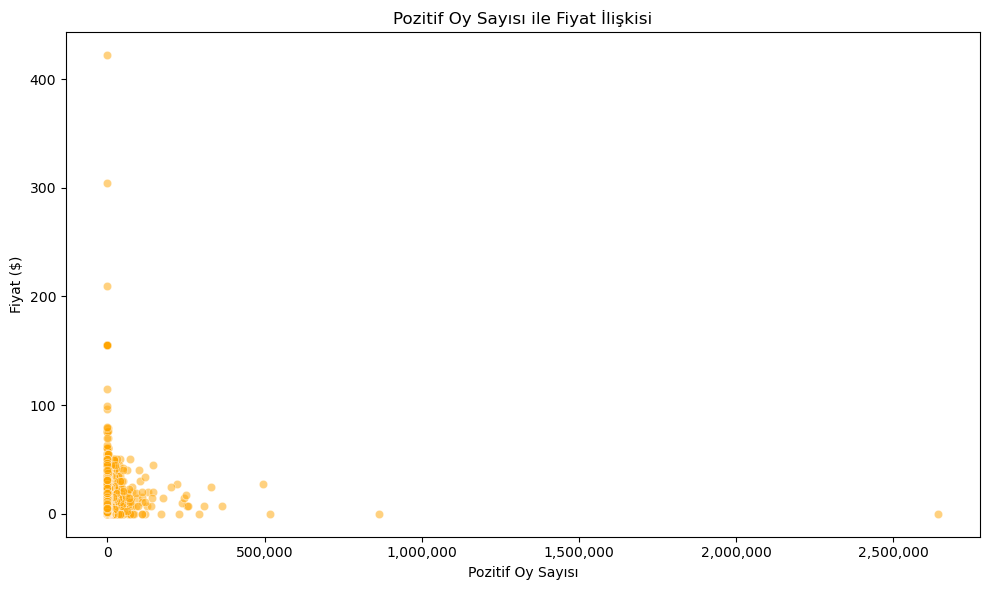

In [15]:
# pozitif oy sayısı ile fiyat arasındaki ilişkiyi gösteren grafik
def pozitif_oy_vs_fiyat(df):
    plt.figure(figsize=(10,6))  
    
    sns.scatterplot(data=df, x="pozitif_oylar", y="fiyat", alpha=0.5, color="orange")
    
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    
    plt.title("Pozitif Oy Sayısı ile Fiyat İlişkisi")  
    plt.xlabel("Pozitif Oy Sayısı")                  
    plt.ylabel("Fiyat ($)")                           
    plt.tight_layout()                                 
    plt.show()
    
pozitif_oy_vs_fiyat(df)


### Yorum

Çok fazla beğeni alan oyunların fiyatı ortalama seviyelerde seyretmekte, yüksek fiyat doğrudan beğeniyle ilişkili değil.


In [16]:
# en çok pozitif oy alan oyunları listeleyen fonksiyon
def en_cok_begenilen_oyunlar(df, adet=5):
    
    sirali = df.sort_values(by="pozitif_oylar", ascending=False)
    return sirali[["isim", "fiyat", "pozitif_oylar"]].head(adet)

en_cok_begenilen_oyunlar(df,10)    




,isim,fiyat,pozitif_oylar
25,Counter-Strike: Global Offensive,0.00,2644404
22,Dota 2,0.00,863507
19,Team Fortress 2,0.00,515879
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,26.99,496184
121,Garry's Mod,6.99,363721
2478,Grand Theft Auto V,24.99,329061
1467,PAYDAY 2,7.49,308657
3362,Unturned,0.00,292574
1120,Terraria,6.99,255600
21,Left 4 Dead 2,7.19,251789


# Ortlama Oynama Süresi ve Fiyat İlişkisi

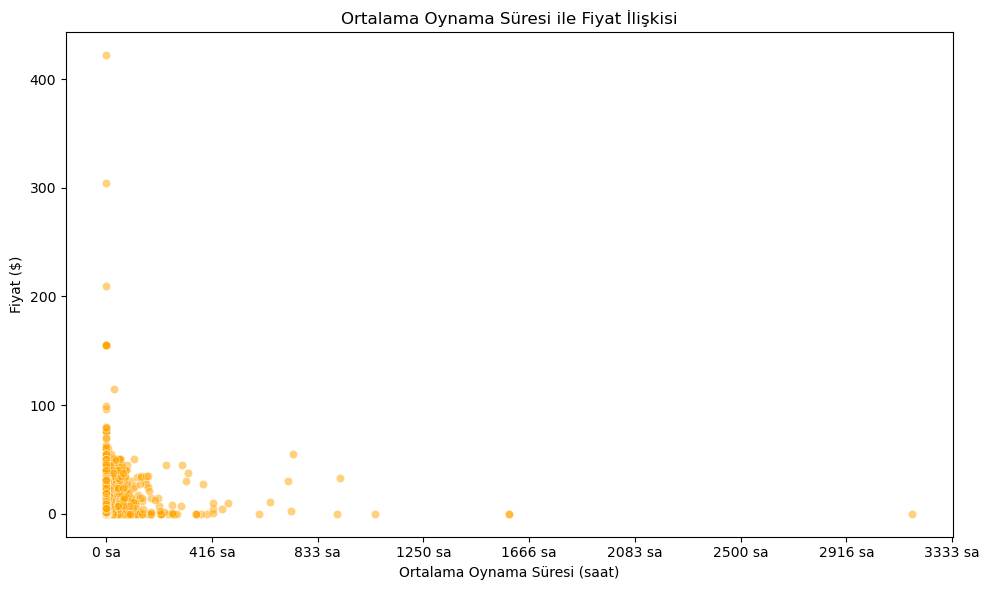

In [17]:
# ortalama oyun süresi ile fiyat ilişkisini gösteren grafik
def oynama_suresi_vs_fiyat(df):
    plt.figure(figsize=(10,6)) 
    
    sns.scatterplot(data=df, x="ortalama_oyun_süresi", y="fiyat", alpha=0.5, color="orange")
    
    # x eksenini saat cinsinden göster (dakikayı 60'a böl)
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x//60)} sa"))
    
    plt.title("Ortalama Oynama Süresi ile Fiyat İlişkisi")  
    plt.xlabel("Ortalama Oynama Süresi (saat)")              
    plt.ylabel("Fiyat ($)")                                   
    plt.tight_layout()                                        
    plt.show()                                                


oynama_suresi_vs_fiyat(df)


### Yorum

Daha uzun süre oynanan oyunların fiyatları orta seviyelerde kalıyor; pahalı oyunlar her zaman uzun süre oynanmıyor.

In [18]:
# ucuz ve çok oynanan oyunları bulan fonksiyon
def ucuz_cok_oynan_oyunlar(df, fiyat_limiti=5, adet=10):
    filtreli = df[(df["fiyat"] < fiyat_limiti) & (df["ortalama_oyun_süresi"] > 0)]
    
    sirali = filtreli.sort_values(by="ortalama_oyun_süresi", ascending=False)
    
    sonuc = sirali[["isim", "fiyat", "ortalama_oyun_süresi", "pozitif_oylar"]].head(adet)
    
    return sonuc


ucuz_cok_oynan_oyunlar(df)     



,isim,fiyat,ortalama_oyun_süresi,pozitif_oylar
9201,The Abbey of Crime Extensum,0.00,190625,146
1478,The Banner Saga: Factions,0.00,95245,569
6014,The Secret of Tremendous Corporation,0.00,95242,218
8969,PRICE,0.00,63481,4198
3969,Shroud of the Avatar: Forsaken Virtues,0.00,54618,1065
23409,懒人修仙传,2.89,43632,404
12195,The Price of Freedom,0.00,36029,333
3803,Darkstone,3.99,27375,160
15212,Warp Rider,3.99,25324,26
16143,The Moon Night,0.79,25317,47


In [19]:
# 5000+ pozitif oyu olan ve çok oynanan oyunları listeleyen fonksiyon
def populer_ve_cok_oynanan(df, adet=10):
     # pozitif oyu 5000'den fazla ve oynama süresi sıfırdan büyük olanları filtrele
    filtreli = df[(df["pozitif_oylar"] > 5000) & (df["ortalama_oyun_süresi"] > 0)]
    
    sirali = filtreli.sort_values(by="ortalama_oyun_süresi", ascending=False)
    sonuc = sirali[["isim", "fiyat", "ortalama_oyun_süresi", "pozitif_oylar"]].head(adet)
    
    return sonuc

populer_ve_cok_oynanan(df)  





,isim,fiyat,ortalama_oyun_süresi,pozitif_oylar
744,FINAL FANTASY XIV Online,9.99,28897,9808
22,Dota 2,0.00,23944,863507
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,26.99,22938,496184
25,Counter-Strike: Global Offensive,0.00,22494,2644404
1127,Arma 3,29.99,18823,105034
0,Counter-Strike,7.19,17612,124534
4931,Eternal Senia,0.00,15961,10106
7027,"Dr. Langeskov, The Tiger, and The Terribly Cur...",0.00,15907,7642
12990,Black Desert Online,7.99,15507,10337
4712,ARK: Survival Evolved,44.99,14154,145035


# Türe Göre En Alınabilir Oyunları Bulma (F/P)

In [20]:
# Alınabilir aksiyon oyunlarını getiren fonksiyon
def alinabilir_aksiyon_oyunlari(df, adet=5):
    df["begeni_orani"] = df["pozitif_oylar"] / (df["pozitif_oylar"] + df["negatif_oylar"])
    df["toplam_oy"] = df["pozitif_oylar"] + df["negatif_oylar"]

    ort_fiyat = df["fiyat"].mean()

    # "Aksiyon" türündeki oyunları seç
    aksiyon = df[df["genres_tr"].str.contains("Aksiyon")]
    
    filtreli = aksiyon[
        (aksiyon["begeni_orani"] >= 0.90) &
        (aksiyon["toplam_oy"] >= 1000) &
        (aksiyon["fiyat"] < ort_fiyat)
    ]

    sirali = filtreli.sort_values(by="begeni_orani", ascending=False).head(adet)
    # beğeni oranını % formatına çevir
    sirali["begeni_orani"] = (sirali["begeni_orani"] * 100).map("{:.1f}%".format)

    return sirali[["isim", "fiyat", "begeni_orani", "toplam_oy"]]

alinabilir_aksiyon_oyunlari(df)



,isim,fiyat,begeni_orani,toplam_oy
2290,One Finger Death Punch,3.99,98.2%,14437
7509,Iron Snout,0.00,98.0%,14166
14070,Orbt XL,0.79,97.9%,2145
4931,Eternal Senia,0.00,97.8%,10333
6994,Princess Remedy in a World of Hurt,0.00,97.8%,2358


# Proje Sonuçları ve Yorumum

- Aksiyon oyunlarında yüksek fiyat, her zaman yüksek beğeni ya da uzun oynanma süresi anlamına gelmemektedir. Bazı düşük fiyatlı aksiyon oyunları, yüksek beğeni oranlarına sahip olmuştur.

- Yapılan analizlerde, oyun fiyatı ile kullanıcı beğenisi (pozitif oylar) arasında belirgin ve güçlü bir ilişki gözlemlenmemiştir. Uygun fiyatlı ama çok sevilen oyunlar da vardır, tam tersi durumlar da mevcuttur.

- En alınabilir oyunlar, genellikle ortalamanın altında bir fiyata sahip olup, 1000'den fazla oylamaya ulaşmış ve %90 üzeri beğeni oranıyla dikkat çeken yapımlardır. Bu oyunlar, fiyat-performans açısından öne çıkmaktadır.

- Beğeni oranı analizlerinde, sadece oran değil, toplam oy sayısı da dikkate alınmıştır. Örneğin %100 beğeni oranı olan ama sadece 10 oy almış bir oyun, veri güvenilirliği açısından zayıftır.

- Ortalama oynama süresi incelendiğinde, bazı ucuz oyunların çok uzun süreler boyunca oynandığı görülmüştür. Bu da düşük maliyetle yüksek oynanabilirlik sağlayan oyunların varlığını göstermektedir.





# Bonus İçerik

In [21]:
# geliştiriciler arasından en çok beğenilenleri gösteren fonk.
def en_begenilen_gelistiriciler(df, adet=5, min_oyun=3):
    df["begeni_orani"] = df["pozitif_oylar"] / (df["pozitif_oylar"] + df["negatif_oylar"])
    
    # geliştiricilere göre oyun sayısı ve ortalama beğeni oranı
    grup = df.groupby("geliştirici").agg({
        "isim": "count",                
        "begeni_orani": "mean"
    }).rename(columns={"isim": "oyun_sayisi"})
    grup = grup[grup["oyun_sayisi"] >= min_oyun]
    grup = grup.sort_values(by="begeni_orani", ascending=False).head(adet)
    
    # beğeni oranını yüzde biçimine çevi
    grup["begeni_orani"] = (grup["begeni_orani"] * 100).map("{:.1f}%".format)
    
    return grup

en_begenilen_gelistiriciler(df)


,oyun_sayisi,begeni_orani
geliştirici,,
Mariaglorum,3,100.0%
Flying Panjandrum / ふらいんぐパンジャンドラム,3,100.0%
Blam! Games,5,100.0%
Workroom7,3,100.0%
Media Art,3,100.0%
